In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_data

In [2]:
read, coad, gse, all_data = load_data()

In [3]:
readX = read.drop(["COVAR_M", "COVAR_N_status"], axis=1)
coadX = coad.drop(["COVAR_M", "COVAR_N_status"], axis=1)
gseX = gse.drop(["COVAR_M", "COVAR_N_status"], axis=1)
adX = all_data.drop(["COVAR_M", "COVAR_N_status"], axis=1)

In [30]:
log_read = np.log(readX)

In [34]:
norm = (log_read - log_read.mean()) / np.sqrt(log_read.var())

In [37]:
norm.var()

A1BG      1.0
A1CF      1.0
A2M       1.0
A2ML1     1.0
A4GALT    1.0
         ... 
ZYG11A    1.0
ZYG11B    1.0
ZYX       1.0
ZZEF1     1.0
ZZZ3      1.0
Length: 16297, dtype: float64

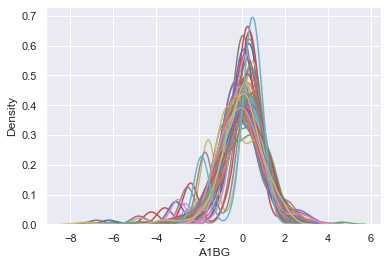

In [45]:
for name in norm.columns[:100]:
    sns.kdeplot(norm[name])

In [57]:
(log_read.var() - log_read[read["COVAR_N_status"] == 0].var()).sort_values()

ZNF705E   -4.284249
MUSTN1    -4.243923
URAD      -4.056307
GSTA1     -3.591349
REG1A     -3.108652
             ...   
FRG2B      2.235984
HSFX2      2.303368
INSL6      2.317803
IL17C      2.829134
TBC1D3C    3.051206
Length: 16297, dtype: float64

<AxesSubplot:xlabel='TBC1D3C', ylabel='Density'>

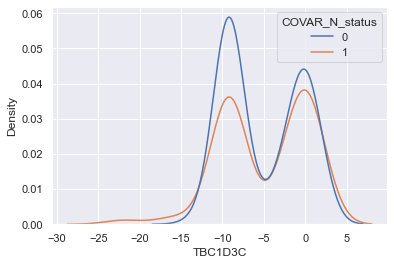

In [61]:
sns.kdeplot(log_read["TBC1D3C"], hue=read["COVAR_N_status"])

<AxesSubplot:xlabel='ZNF705E', ylabel='Density'>

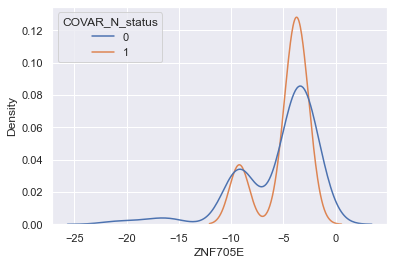

In [60]:
sns.kdeplot(log_read["ZNF705E"], hue=read["COVAR_N_status"])

In [58]:
(log_read.var() - log_read[read["COVAR_N_status"] == 1].var()).sort_values()

TBC1D3C    -3.893034
HSFX2      -2.844281
FRG2B      -2.774753
KIAA0408   -2.642031
TLR9       -2.570787
              ...   
GRP         4.603607
GSTA1       5.146776
URAD        5.153909
ZNF705E     5.175174
MUSTN1      5.761818
Length: 16297, dtype: float64

In [64]:
log_read[read["COVAR_N_status"] == 1].var().sort_values()

PMF1           0.046290
PSMB4          0.053414
LCMT1          0.053683
PEX11B         0.055128
RBM4           0.055208
                ...    
FRG2B         26.350591
TBC1D3C       27.538370
PIGY          31.564269
AL512428.1    31.886846
AC005702.1    31.929615
Length: 16297, dtype: float64

<AxesSubplot:xlabel='PIGY', ylabel='Density'>

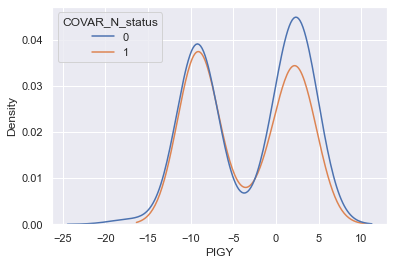

In [63]:
sns.kdeplot(log_read["PIGY"], hue=read["COVAR_N_status"])

In [71]:
(log_read[read["COVAR_N_status"] == 0].mean() - log_read[read["COVAR_N_status"] == 1].mean()).sort_values()

PGAM2        -2.092623
MOGAT1       -1.812383
THSD7B       -1.749718
GRP          -1.587241
AC093668.1   -1.541173
                ...   
PPIAL4A       1.232047
NPIPA2        1.254890
RLBP1         1.284750
SLC5A8        1.308457
IL17C         1.562783
Length: 16297, dtype: float64

In [68]:
(log_read.mean() - log_read[read["COVAR_N_status"] == 1].mean()).sort_values()

PGAM2        -1.131859
MOGAT1       -0.980283
THSD7B       -0.946388
GRP          -0.858508
AC093668.1   -0.833591
                ...   
PPIAL4A       0.666390
NPIPA2        0.678746
RLBP1         0.694896
SLC5A8        0.707719
IL17C         0.845279
Length: 16297, dtype: float64

<AxesSubplot:xlabel='PGAM2', ylabel='Density'>

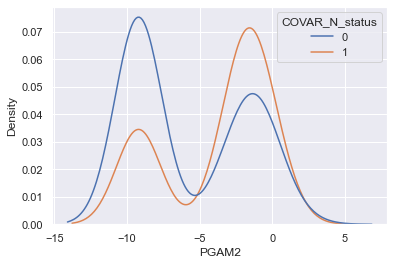

In [73]:
sns.kdeplot(log_read["PGAM2"], hue=read["COVAR_N_status"])

In [75]:
(log_read.mean() - log_read[read["COVAR_M"] == 1].mean()).sort_values()

RPRML      -2.176265
PPIAL4C    -1.666582
OR2C1      -1.652563
CEACAM16   -1.641151
KRT9       -1.569638
              ...   
DEFA6       1.524168
FOXD4L4     1.530725
IFITM5      1.666277
DEFA5       1.980657
ANXA10      2.051925
Length: 16297, dtype: float64

<AxesSubplot:xlabel='RPRML', ylabel='Density'>

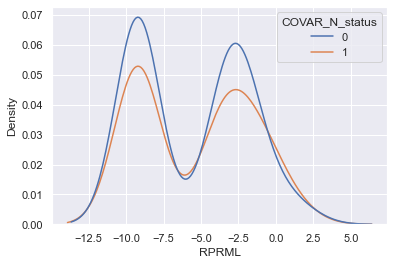

In [76]:
sns.kdeplot(log_read["RPRML"], hue=read["COVAR_N_status"])

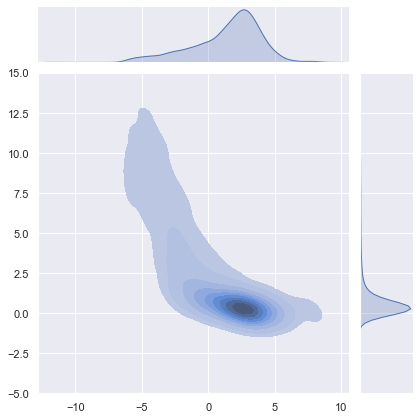

In [25]:
sns.jointplot(x=np.log(readX).mean(), y=np.log(readX).var(), kind="kde", fill=True, ylim=(-5, 15))

In [180]:
np.log(readX)

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAGAB,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0.965268,0.573631,4.998108,-0.817357,2.689096,3.937435,2.846790,-2.024315,2.213065,3.427298,...,2.850798,3.591937,0.301859,1.475751,2.465656,-3.047863,1.660466,5.120565,1.800184,2.702250
1,1.686888,2.201102,5.005600,-1.353414,2.501229,3.102321,2.587745,-3.293960,0.638864,3.450737,...,1.669470,3.122496,0.073483,1.042754,1.995816,-2.234651,2.158816,4.688031,3.056305,2.176242
2,1.872267,-0.197154,5.211943,-2.235624,2.190302,3.140276,2.418229,-0.953209,1.260622,3.053517,...,1.910914,2.759450,-0.289103,0.905197,1.842165,-3.767135,1.245211,4.590681,1.310931,2.180992
3,1.623747,1.705636,4.313049,-1.823915,1.337678,3.190998,2.114581,0.766412,1.031963,3.091341,...,1.784249,3.489758,0.166404,1.345548,2.402934,-2.834309,1.077720,4.442530,1.708774,2.270126
4,1.504847,1.923928,5.096898,-2.535143,2.281699,3.031487,2.958126,-3.244537,0.959866,3.774929,...,1.966956,3.250922,0.041852,1.152526,1.913916,-2.345831,2.205894,5.027125,2.876489,2.246203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.666036,1.501314,4.303264,-0.981029,1.390310,3.522198,2.954868,0.970707,2.741700,3.877721,...,3.132136,4.494117,0.291863,1.453787,2.199933,-2.570025,1.581326,4.807103,2.188093,2.712418
155,0.574616,1.869405,3.842940,-1.396350,1.411394,3.563089,3.431974,-1.656309,2.303987,3.821095,...,2.467340,4.193043,-0.167587,1.263262,2.523650,-3.259292,1.174903,4.496511,2.328367,2.621000
156,1.130676,1.645147,4.281188,-1.990078,1.755650,3.499920,2.706527,-0.914420,0.979428,3.447849,...,2.213185,3.712249,-0.099295,1.075395,2.909894,-2.981472,1.565998,4.906815,1.597748,2.736983
157,1.610811,1.700250,5.132709,-1.285295,2.287321,3.394932,3.012379,-2.557604,0.865124,2.988344,...,2.295821,3.194472,0.139083,1.186226,2.170368,-2.641619,1.801291,4.802674,1.888213,2.894932


In [179]:
coadX.min().sort_values()

NPB          5.457900e-284
GOLGA6L22    4.261750e-274
KRT6C        3.486670e-201
CTAGE15      4.049800e-139
FOXD4         2.874550e-48
                 ...      
RPL41         3.282862e+02
TPT1          3.771032e+02
RPS24         4.241641e+02
B2M           4.581817e+02
EEF1A1        6.401292e+02
Length: 16292, dtype: float64

In [176]:
np.log(coadX).min().sort_values()

NPB         -652.237102
GOLGA6L22   -629.458636
KRT6C       -461.570657
CTAGE15     -318.660660
FOXD4       -109.468188
                ...    
RPL41          5.793886
TPT1           5.932519
RPS24          6.050120
B2M            6.127266
EEF1A1         6.461670
Length: 16292, dtype: float64

Feature analysis for each dataset:

What are the distributions of the means and medians and variance?

What are the distributions of the skew?

In [33]:
read_means = readX.mean()
read_medians = readX.median()
read_vars = readX.var()
read_skews = readX.skew()

In [37]:
read_means = readX.mean()
coad_means = coadX.mean()
gse_means = gseX.mean()
ad_means = adX.mean()

In [45]:
sns.set()

In [74]:
means = {
    "read": readX.mean(),
    "coad": coadX.mean(),
    "gse": gseX.mean(),
    "ad": adX.mean(),
}
skews = {
    "read": readX.skew(),
    "coad": coadX.skew(),
    "gse": gseX.skew(),
    "ad": adX.skew(),
}

In [75]:
sets = ["read", "coad", "gse", "ad"]

/Users/ZanderL/opt/anaconda3/envs/cs229project/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ZanderL/opt/anaconda3/envs/cs229project/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ZanderL/opt/anaconda3/envs/cs229project/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ZanderL/opt/anaconda3/envs/cs229project/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


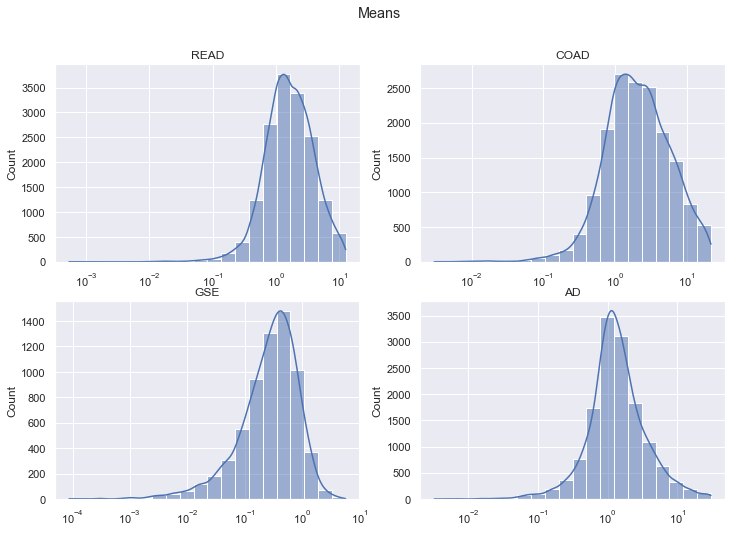

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
 
pos = (axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1])
fig.suptitle('Means')

for data, ax in zip(sets, pos):
    ax.set_title(data.upper())
    sns.histplot(skews[data], bins=20, log_scale=True, kde=True, ax=ax)

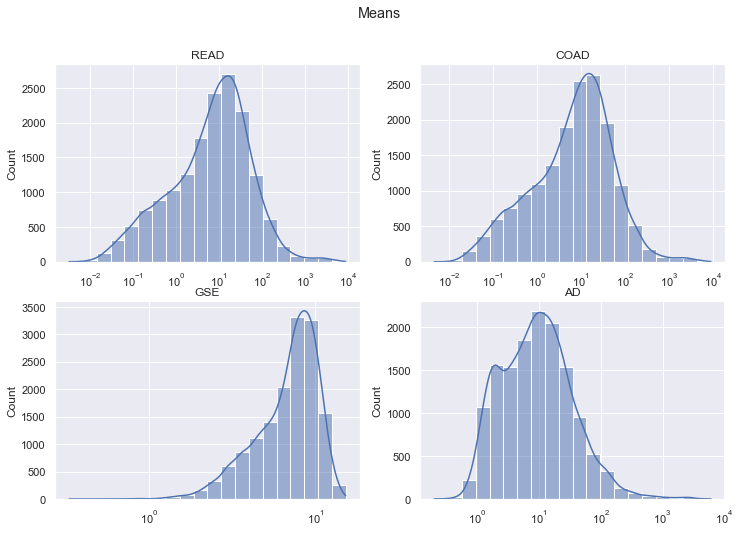

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
 
pos = (axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1])
fig.suptitle('Means')

for data, ax in zip(sets, pos):
    ax.set_title(data.upper())
    sns.histplot(means[data], bins=20, log_scale=True, kde=True, ax=ax)

<AxesSubplot:ylabel='Count'>

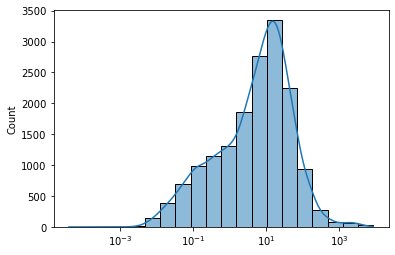

In [32]:
sns.histplot(read_medians, bins=20, log_scale=True, kde=True)

<AxesSubplot:ylabel='Count'>

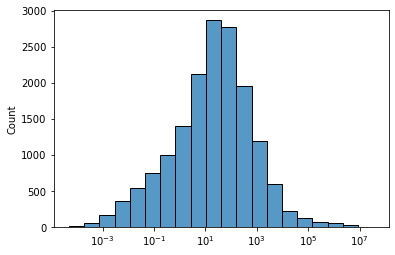

In [36]:
sns.histplot(read_vars, bins=20, log_scale=True)

In [146]:
most_var = gse.var().sort_values(ascending=False)[:100].index

<AxesSubplot:xlabel='MEP1A', ylabel='Density'>

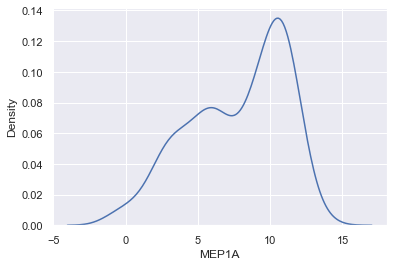

In [153]:
sns.kdeplot(gse[most_var[20]])

In [ ]:
read = 

In [164]:
read.min().min()

0.0

In [159]:
read.min().min()

0.0

In [156]:
gseX.max().max()

16.2964737323425

In [157]:
gseX.min().min()

-10.2001268701828

In [151]:
most_var

Index(['GKN1', 'GKN2', 'FABP1', 'SLC26A3', 'LIPF', 'SI', 'RPS4Y1', 'SPINK4',
       'MSMB', 'DEFA5', 'SLC28A2', 'LTF', 'AKR1C2', 'PGC', 'C6orf58',
       'SOSTDC1', 'CRISP3', 'ANXA10', 'GCG', 'SST', 'MEP1A', 'PSCA', 'CLCA1',
       'TFF2', 'ADH4', 'REG1A', 'REG1B', 'KRT20', 'GSTA1', 'MAGEA4', 'MTTP',
       'OTC', 'SCGB2A1', 'GC', 'USP9Y', 'DEFA6', 'EIF1AY', 'RBP2', 'ORM1',
       'IRX2', 'PCK1', 'OLFM4', 'LIN28B', 'TM4SF4', 'ADH1C', 'C7', 'OGN',
       'CHP2', 'GUCY2C', 'ATP4B', 'MAGEA11', 'KCNE2', 'UGT2B17', 'SPRR1A',
       'REG4', 'SLCO1B3', 'GABRP', 'SMPX', 'KRT6A', 'TM4SF20', 'FAM3B', 'CHGA',
       'HEPACAM2', 'ITLN1', 'LGSN', 'NLRP2', 'AKR1B10', 'CPS1', 'UGT2A3',
       'ATP4A', 'COL11A1', 'RFX6', 'GJB6', 'KRT6C', 'NAT2', 'LIN28A', 'ECHDC3',
       'TCN1', 'PRAP1', 'LIPC', 'SEMG1', 'FUT9', 'SERPINB3', 'ZIC2', 'ZNF750',
       'DKK1', 'ALDOB', 'MUC5B', 'TAC1', 'MEOX2', 'HORMAD1', 'CLDN18', 'CDX1',
       'VIP', 'PPP1R14C', 'WIF1', 'ASB5', 'DDX3Y', 'ADH1B', 'LRRC19'],
      dtype

In [134]:
normal = abs(adX.mean() - adX.median()).sort_values()[:100].index

<AxesSubplot:xlabel='TIAM2', ylabel='Density'>

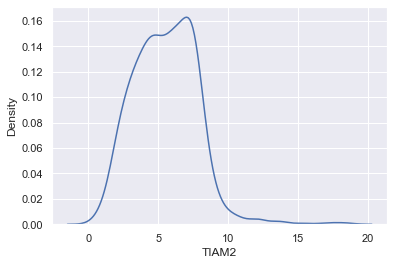

In [135]:
sns.kdeplot(adX[normal[4]])

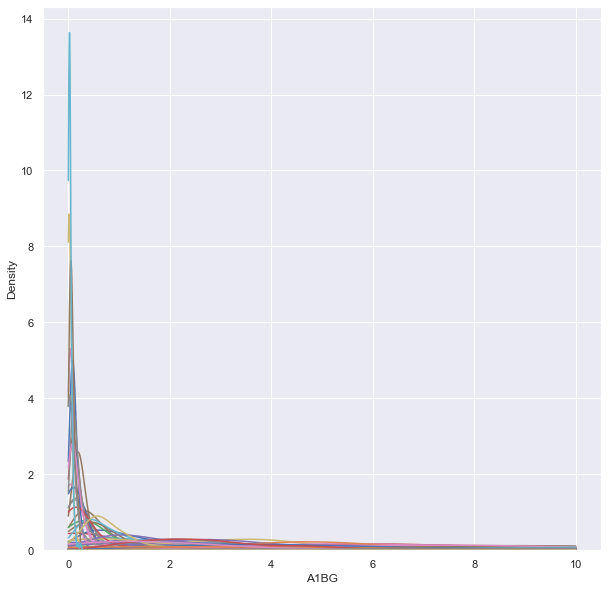

In [84]:
plt.figure(figsize=(10, 10))
for i in range(100):
    col = readX.columns[i]
    sns.kdeplot(readX[col], clip=(0, 10), )